### importing the dependencies

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [7]:
loan_p = pd.read_csv("train_loanpred.csv")
loan_p.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [8]:
loan_p.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
loan_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
loan_p.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### number of missing value

In [11]:
loan_p["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
loan_p["Gender"].replace({"?":n})

In [12]:
loan_p["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

### dropping the missing vlaaue

In [13]:
loan_p = loan_p.dropna()

In [14]:
loan_p.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### label encoding

In [15]:
loan_p.replace({"Loan_Status":{"N":0,"Y":1}},inplace= True)

In [17]:
loan_p.head(
    5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [19]:
loan_p.info()
loan_p.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 52.5+ KB


(480, 13)

### dependent column values

In [20]:
loan_p["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

### replacing the value of 3+  to 4

In [22]:
loan_p = loan_p.replace(to_replace = "3+",value =4)
loan_p["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### EDA

### education and loan status

<AxesSubplot:xlabel='Education', ylabel='count'>

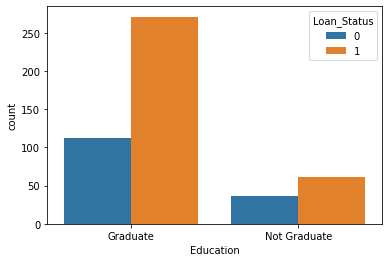

In [25]:
sns.countplot(x= "Education", hue="Loan_Status" ,data=loan_p)

<AxesSubplot:xlabel='Married', ylabel='count'>

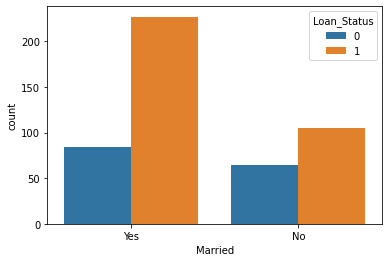

In [26]:
sns.countplot(x = "Married" ,hue = "Loan_Status" ,data=loan_p)

In [28]:
loan_p.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.043152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.049020
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.071753
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.007798
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.529390
Loan_Status,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,1.000000


<AxesSubplot:>

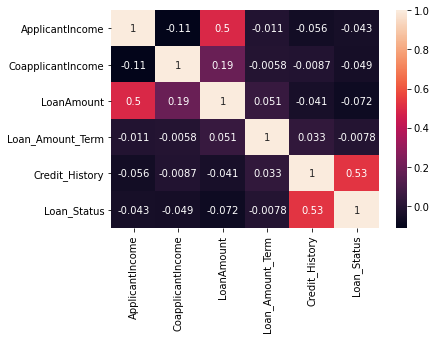

In [30]:
sns.heatmap(loan_p.corr(), annot = True)

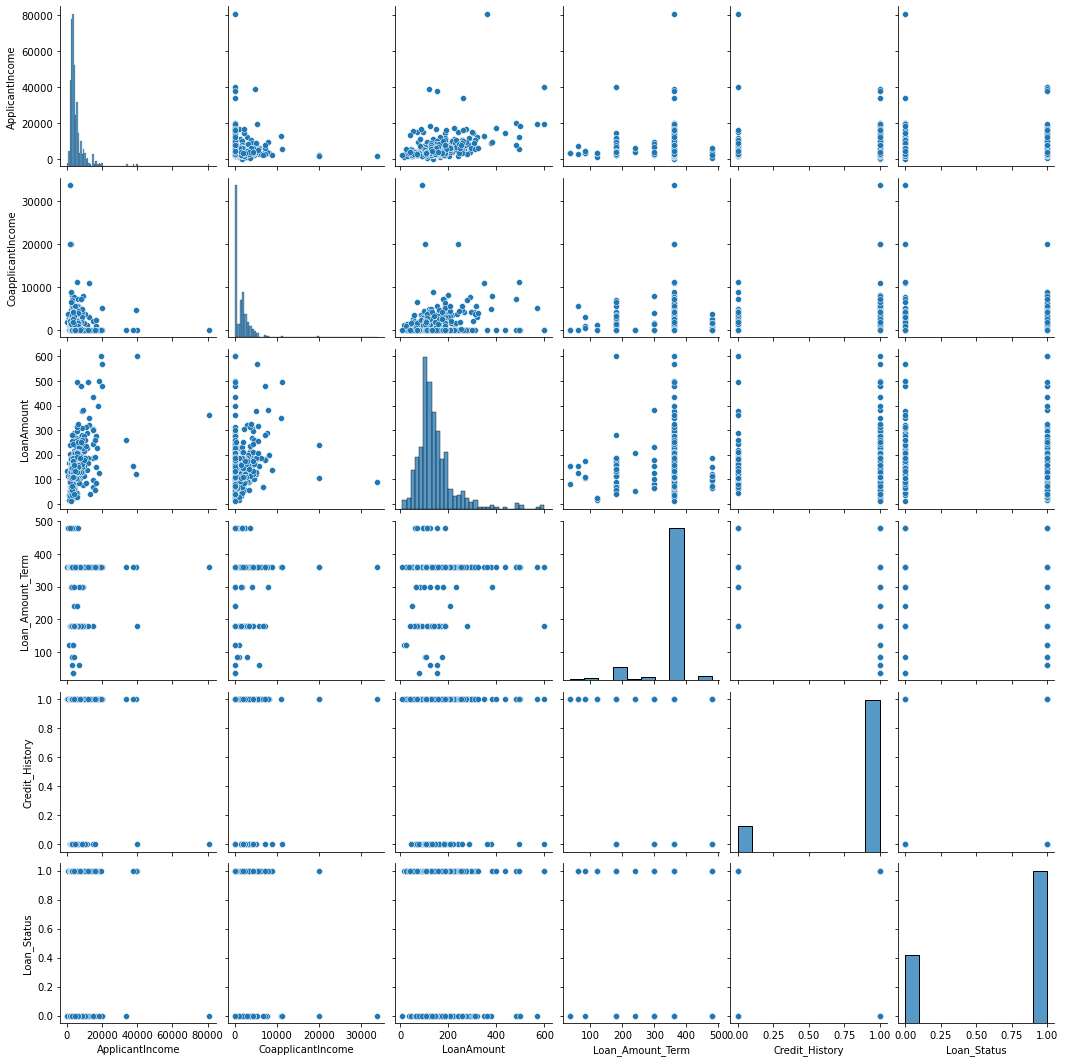

In [31]:
sns.pairplot(loan_p)

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

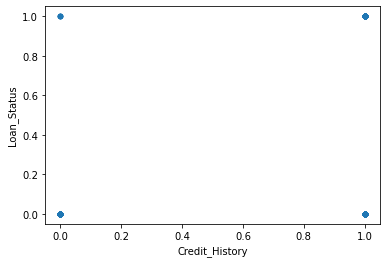

In [36]:
loan_p.plot(x= "Credit_History" , y = "Loan_Status", kind= "scatter")

### converting categorical value to numerical

In [42]:
loan_p.replace({"Gender":{"Male":1, "Female":0}},inplace= True)
loan_p.head(5)
import warnings
warnigs.filterwarnings("ignore")

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [43]:
loan_p.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,1,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [44]:
loan_p.replace({"Married":{"Yes":1,"No":0}},inplace= True)

In [45]:
loan_p.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,1,1,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [46]:
loan_p.replace({"Education":{"Graduate":1,"Not Graduate":0}},inplace = True)

In [47]:
loan_p.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,1,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,1,1,0,0,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [52]:
loan_p.replace({"Self_Employed":{"Yes":1,"No":0},"Property_Area":{"Rural":0,"Semiurban":1,"Urban":2}},inplace= True)

In [53]:
loan_p.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1


In [55]:
# sns.heatmap(loan_p.corr())

### seperating x and y

In [57]:
x = loan_p.drop(columns = ["Loan_ID","Loan_Status"],axis = 1) #axis =1 colunm1,row =0
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [58]:
y = loan_p["Loan_Status"]
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

### train test split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state =45)

### training the model`

In [66]:
classifier = svm.SVC(kernel = "linear")

In [67]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

### model evalution

#### accuracu score on traing data

In [74]:
x_train_pred = classifier.predict(x_train)
training_data_accurary  = accuracy_score(x_train_pred,y_train)

In [75]:
print("accaracy on training data:",training_data_accurary)

accaracy on training data: 0.7986111111111112


#### accuracy on test data

In [86]:
x_test_pred = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_pred,y_test)
print("accaracy on training data:",test_data_accuracy)

accaracy on training data: 0.8125


In [87]:
print("accaracy on training data:",test_data_accuracy)

accaracy on training data: 0.8125
